In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('EmployeeTerminations.csv')
dataset.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [3]:
dataset_df = dataset.drop(['EmployeeID','store_name'],axis=1)
dataset_df.describe()

,age,length_of_service,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000
mean,42.077035,10.434596,2010.612612
std,12.427257,6.325286,2.845577
min,19.000000,0.000000,2006.000000
25%,31.000000,5.000000,2008.000000
50%,42.000000,10.000000,2011.000000
75%,53.000000,15.000000,2013.000000
max,65.000000,26.000000,2015.000000


In [4]:
dataset.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


In [5]:
dataset.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [22]:
ser_active = pd.Series(0,set(dataset.length_of_service))
ser_active

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
dtype: int64

In [23]:
# Count number of ACTIVE people at each length of service
for ind in range(0,len(dataset)):
    if(dataset.iloc[ind].STATUS == 'ACTIVE'):
        ser_active[(dataset.iloc[ind].length_of_service)] += 1
ser_active

0     1931
1     2086
2     2225
3     2247
4     2236
5     2196
6     2245
7     2317
8     2341
9     2364
10    2412
11    2465
12    2558
13    2400
14    2187
15    2177
16    2156
17    2047
18    1819
19    1580
20    1286
21    1037
22     825
23     602
24     354
25      61
26      14
dtype: int64

In [24]:
ser_total = dataset.length_of_service.value_counts().sort_index()
ser_total

0     1962
1     2222
2     2257
3     2270
4     2262
5     2258
6     2294
7     2341
8     2559
9     2381
10    2432
11    2482
12    2567
13    2885
14    2203
15    2192
16    2160
17    2066
18    1829
19    1656
20    1322
21    1047
22     830
23     608
24     433
25     121
26      14
Name: length_of_service, dtype: int64

In [25]:
ser_terminated = pd.Series(0,set(dataset.length_of_service))
for i in range(0,len(set(dataset.length_of_service))):
    ser_terminated[i] = ser_total[i] - ser_active[i]
ser_terminated

0      31
1     136
2      32
3      23
4      26
5      62
6      49
7      24
8     218
9      17
10     20
11     17
12      9
13    485
14     16
15     15
16      4
17     19
18     10
19     76
20     36
21     10
22      5
23      6
24     79
25     60
26      0
dtype: int64

In [95]:
cols = ['Length of Service', 'Active Count', 'Terminated Count']
length_of_service = pd.DataFrame([])
for i in range(0,len(set(dataset.length_of_service))):
    length_of_service = length_of_service.append(pd.DataFrame({'Length of Service': i, 'Active Count': ser_active[i], 'Terminated Count': ser_terminated[i],'Total': ser_total[i], 'Percentage Active':round((ser_active[i]/ser_total[i])*100,3)}, index=[0]), ignore_index=True)
    
length_of_service

,Length of Service,Active Count,Terminated Count,Total,Percentage Active
0,0,1931,31,1962,98.420
1,1,2086,136,2222,93.879
2,2,2225,32,2257,98.582
3,3,2247,23,2270,98.987
4,4,2236,26,2262,98.851
5,5,2196,62,2258,97.254
6,6,2245,49,2294,97.864
7,7,2317,24,2341,98.975
8,8,2341,218,2559,91.481
9,9,2364,17,2381,99.286


In [97]:
dataset.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


Examine the reason for Termination at various length of their service

In [6]:
dataset.termreason_desc.value_counts()

Not Applicable    48168
Retirement          885
Resignaton          385
Layoff              215
Name: termreason_desc, dtype: int64

In [7]:
dataset.STATUS.value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

In [8]:
dataset_termination = dataset[(dataset.STATUS=='TERMINATED') & ((dataset.termreason_desc=='Layoff') | (dataset.termreason_desc=='Resignaton') )]
dataset_termination.termreason_desc.value_counts()

Resignaton    385
Layoff        215
Name: termreason_desc, dtype: int64

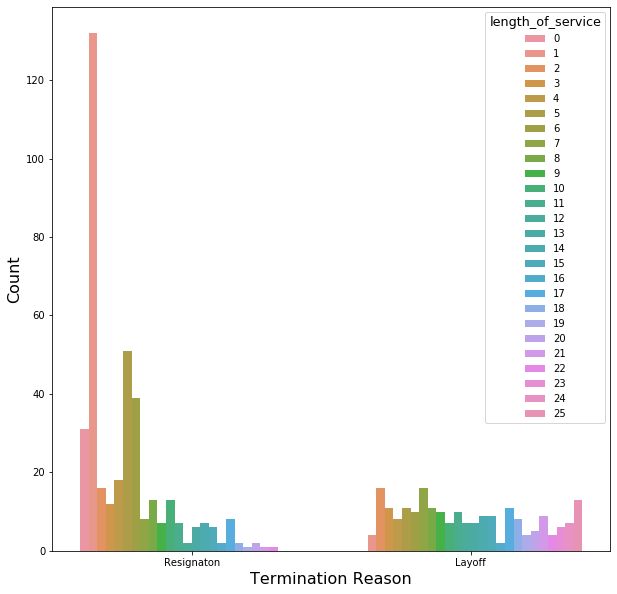

In [9]:
plt.figure(figsize=(10, 10))
plt.rcParams["axes.labelsize"] = 15
sns.countplot(dataset_termination['termreason_desc'],hue='length_of_service',data=dataset_termination)
plt.xlabel('Termination Reason',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

We can see that there are a lot of resignations during the 5-6 years of service, with a lot of the newly hired employees leaving almost right after they start, followed by alarming increase in the following year. This could be because most of these employees encounter a Life inside the company which is vastly different from what they expected it was going to be. So this could be an area to look into for the client.



In [10]:
dataset_termination.STATUS_YEAR.value_counts()

2014    197
2015     99
2012     76
2011     69
2013     49
2010     29
2008     26
2007     25
2009     18
2006     12
Name: STATUS_YEAR, dtype: int64

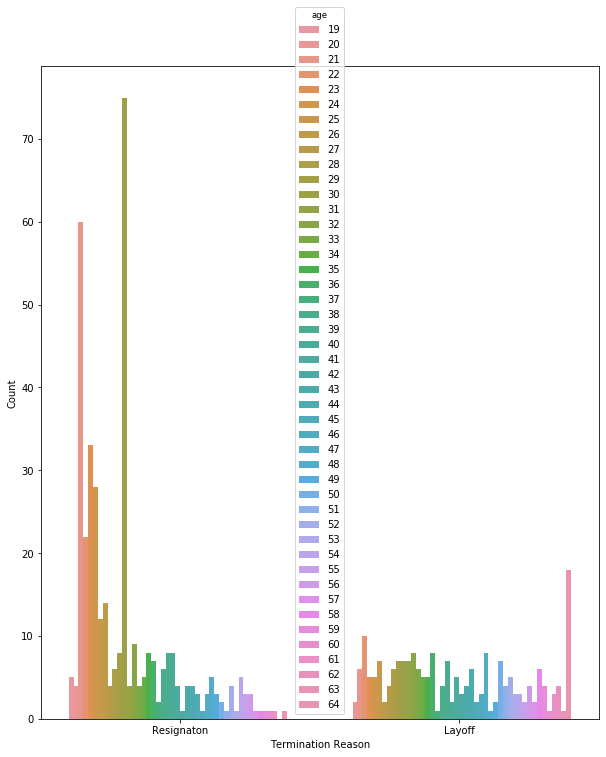

In [11]:
plt.figure(figsize=(10, 12))
plt.rcParams["axes.labelsize"] = 10
sns.countplot(dataset_termination['termreason_desc'],hue='age',data=dataset_termination)
plt.xlabel('Termination Reason',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()

A lot of employees resign during their 21-25 age maybe because at this age they still actively look for jobs and found a better opportunity. Also a huge number of resignations occur when they reach 30, again maybe due to better career opportunities or maybe family commitments force them to change jobs.

In [12]:
dataset_termination.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
48186,1365,9/1/2012 0:00,3/24/1949,10/10/1989,9/26/2012,63,22,Fort St John,Store Management,Store Manager,12,F,Female,Resignaton,Voluntary,2012,TERMINATED,STORES
48265,1484,7/1/2007 0:00,11/22/1949,2/15/1990,7/25/2007,57,17,Vancouver,HR Technology,HRIS Analyst,35,M,Male,Resignaton,Voluntary,2007,TERMINATED,HEADOFFICE
48302,1545,12/1/2014 0:00,2/20/1950,4/4/1990,12/30/2014,64,24,Dawson Creek,Bakery,Baker,9,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES
48347,1613,12/1/2014 0:00,7/11/1950,6/17/1990,12/30/2014,64,24,Grand Forks,Store Management,Store Manager,13,M,Male,Layoff,Involuntary,2014,TERMINATED,STORES
48354,1624,3/1/2011 0:00,8/3/1950,6/29/1990,3/26/2011,60,20,Vancouver,Dairy,Dairy Person,41,F,Female,Resignaton,Voluntary,2011,TERMINATED,STORES


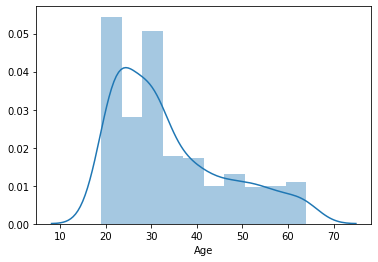

In [13]:
sns.distplot(dataset_termination['age'],bins=10)
plt.xlabel('Age')
plt.show()

Seeing which departments are prone to termination

In [14]:
dataset.department_name.value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Accounts Payable             34
Labor Relations              34
Training                     30
Investment                   24
Audit                        24
Compensation                 24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

In [15]:
dataset_termination.department_name.value_counts()

Customer Service    249
Dairy               110
Processed Foods      75
Meats                60
Bakery               51
Produce              47
Store Management      7
HR Technology         1
Name: department_name, dtype: int64

In [16]:
all_depts = set(dataset.department_name.value_counts().index)
terminating_depts = set(dataset_termination.department_name.value_counts().index)
non_terminating_depts = all_depts-terminating_depts
non_terminating_depts

{'Accounting',
 'Accounts Payable',
 'Accounts Receiveable',
 'Audit',
 'Compensation',
 'Employee Records',
 'Executive',
 'Information Technology',
 'Investment',
 'Labor Relations',
 'Legal',
 'Recruitment',
 'Training'}

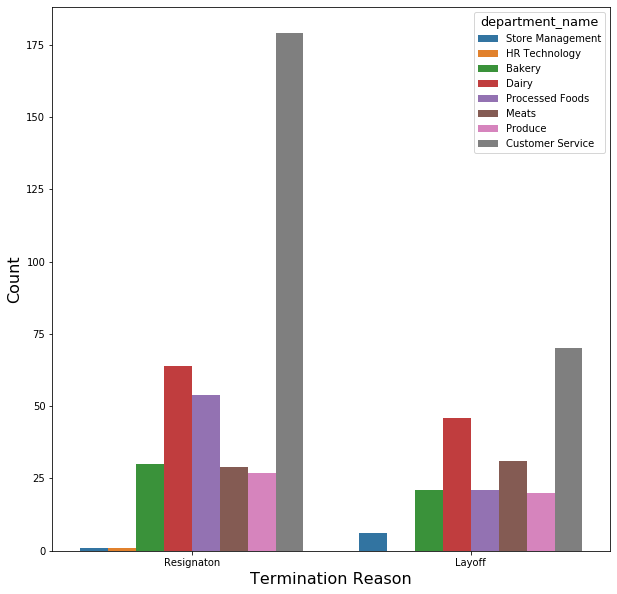

In [17]:
plt.figure(figsize=(10, 10))
plt.rcParams["axes.labelsize"] = 15
sns.countplot(dataset_termination['termreason_desc'],hue='department_name',data=dataset_termination)
plt.xlabel('Termination Reason',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

So Customer Service employees are most likely to resign and then Dairy department. So these departments might need some retention programs.

In [18]:
dataset_termination.job_title.value_counts()

Cashier                     246
Dairy Person                110
Shelf Stocker                71
Meat Cutter                  56
Baker                        47
Produce Clerk                43
Store Manager                 7
Bakery Manager                4
Produce Manager               4
Meats Manager                 4
Processed Foods Manager       4
Customer Service Manager      3
HRIS Analyst                  1
Name: job_title, dtype: int64

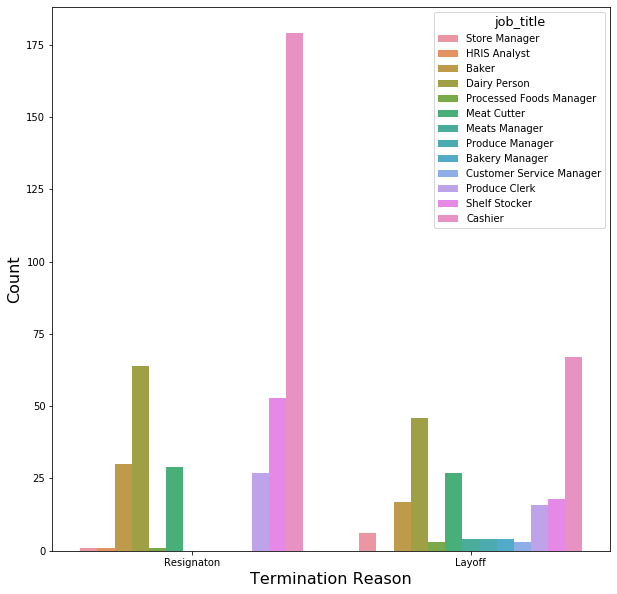

In [19]:
plt.figure(figsize=(10, 10))
plt.rcParams["axes.labelsize"] = 15
sns.countplot(dataset_termination['termreason_desc'],hue='job_title',data=dataset_termination)
plt.xlabel('Termination Reason',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

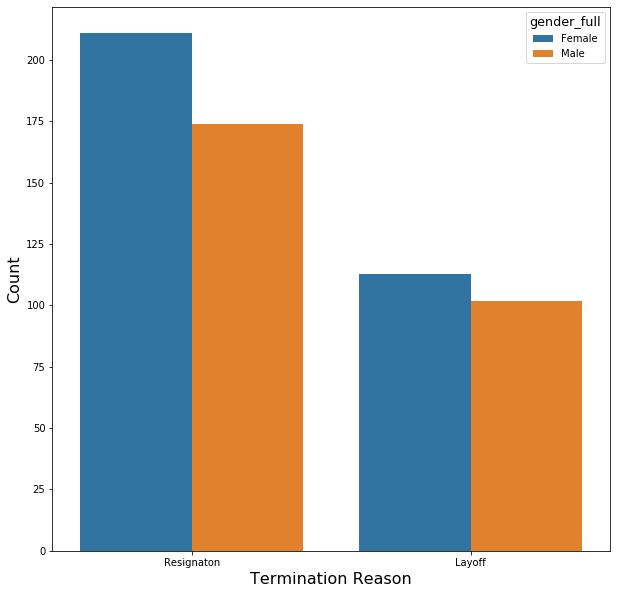

In [20]:
plt.figure(figsize=(10, 10))
plt.rcParams["axes.labelsize"] = 15
sns.countplot(dataset_termination['termreason_desc'],hue='gender_full',data=dataset_termination)
plt.xlabel('Termination Reason',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

In [21]:
dataset.EmployeeID.nunique()

6284

In [22]:
dataset_terminated = dataset[(dataset['STATUS']=='TERMINATED')]

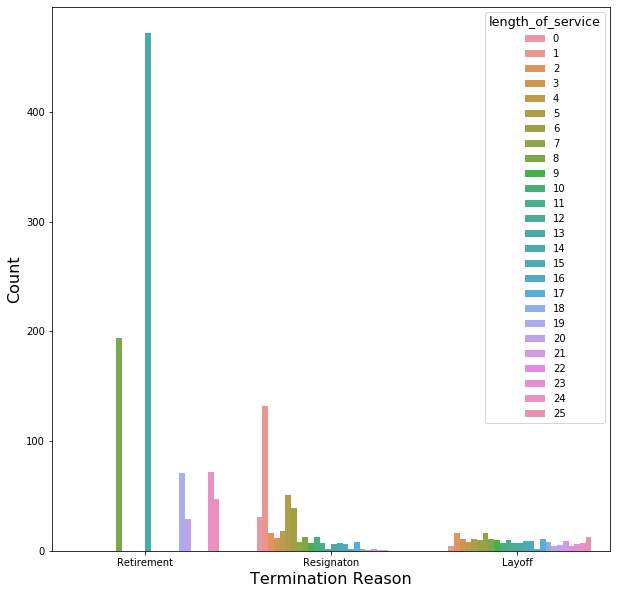

In [23]:
plt.figure(figsize=(10, 10))
plt.rcParams["axes.labelsize"] = 15
sns.countplot(dataset_terminated['termreason_desc'],hue='length_of_service',data=dataset_terminated)
plt.xlabel('Termination Reason',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

In [24]:
dataset[dataset.termreason_desc=='Layoff'].STATUS_YEAR.value_counts()

2014    142
2015     73
Name: STATUS_YEAR, dtype: int64

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
